# Linear Regression
## Lecture 1 of 2

In [ ]:
'''
Alec M.
INST414

06/25/2021
'''

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
x = np.linspace(1, 10, num = 10)
y = np.array([2.3, 7.8, 3.9, 11.1, 12.9, 14, 22.2, 24.7, 27.1, 26.7])

In [3]:
x = x.reshape(-1, 1)
y = y.reshape(-1, 1)

In [4]:
y

array([[ 2.3],
       [ 7.8],
       [ 3.9],
       [11.1],
       [12.9],
       [14. ],
       [22.2],
       [24.7],
       [27.1],
       [26.7]])

In [5]:
x

array([[ 1.],
       [ 2.],
       [ 3.],
       [ 4.],
       [ 5.],
       [ 6.],
       [ 7.],
       [ 8.],
       [ 9.],
       [10.]])

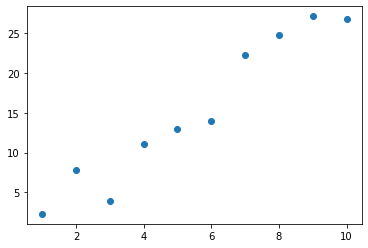

In [6]:
plt.scatter(x, y);

In [7]:
from sklearn import linear_model

In [8]:
ourModel = linear_model.LinearRegression()

In [10]:
ourModel.fit(x, y)

LinearRegression()

In [11]:
y_pred = ourModel.predict(x) # Make a prediction off of the model

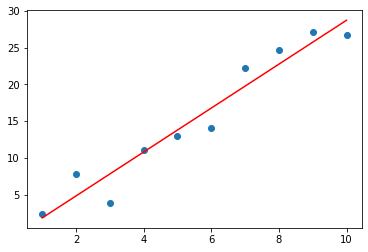

In [13]:
plt.scatter(x, y)
plt.plot(x, y_pred, c = "red") # Predicted linear model
plt.show()

In [14]:
from sklearn.model_selection import train_test_split

In [16]:
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size = 0.3) # Split the values into a training/testing set

In [17]:
xtrain

array([[7.],
       [3.],
       [6.],
       [9.],
       [1.],
       [4.],
       [5.]])

In [18]:
xtest

array([[ 2.],
       [10.],
       [ 8.]])

In [19]:
ytrain

array([[22.2],
       [ 3.9],
       [14. ],
       [27.1],
       [ 2.3],
       [11.1],
       [12.9]])

In [20]:
ytest

array([[ 7.8],
       [26.7],
       [24.7]])

In [21]:
model2 = linear_model.LinearRegression()

In [22]:
model2.fit(xtrain, ytrain)

LinearRegression()

In [23]:
ypred_test = model2.predict(xtest)

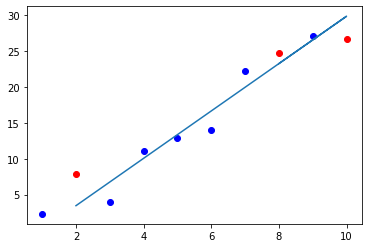

In [25]:
plt.scatter(xtrain, ytrain, c = "blue") # Training data
plt.scatter(xtest, ytest, c = "red") # Testing data
plt.plot(xtest, ypred_test);

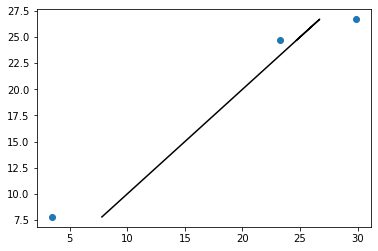

In [29]:
plt.scatter(ypred_test, ytest)
plt.plot(ytest, ytest, c = "k")
plt.show()

In [32]:
import sklearn.metrics as metrics

In [33]:
mse = metrics.mean_squared_error(ytest, ypred_test) # Mean standard error of the y-model

In [34]:
mse

10.342212773998495

In [35]:
mae = metrics.mean_absolute_error(ytest, ypred_test) # Mean absolute error of the y-model, not accurate usually

In [36]:
mae

2.9849206349206345

In [37]:
r2 = metrics.r2_score(ytest, ypred_test) # If R2 is 1, the model is a perfect fit. 0 is no fit.

In [38]:
r2

0.8560961087072346

In [39]:
from sklearn.model_selection import cross_val_score

In [41]:
linModel = linear_model.LinearRegression()

In [42]:
cve = cross_val_score(linModel, x, y)

In [43]:
cve

array([  -1.35326868,    0.10044878,  -19.09297521,   -5.27949136,
       -100.4377303 ])

## Lecture 2 of 2

### SAT Score Dataset

In [45]:
SAT = pd.read_csv("SAT_Results.csv")
SAT.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 421 entries, 0 to 420
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   DBN                  421 non-null    object
 1   SCHOOL NAME          421 non-null    object
 2   Num_SAT_test_takers  421 non-null    int64 
 3   Crit_Reading         421 non-null    int64 
 4   Math                 421 non-null    int64 
 5   Writing              421 non-null    int64 
dtypes: int64(4), object(2)
memory usage: 19.9+ KB


In [46]:
import seaborn as sns

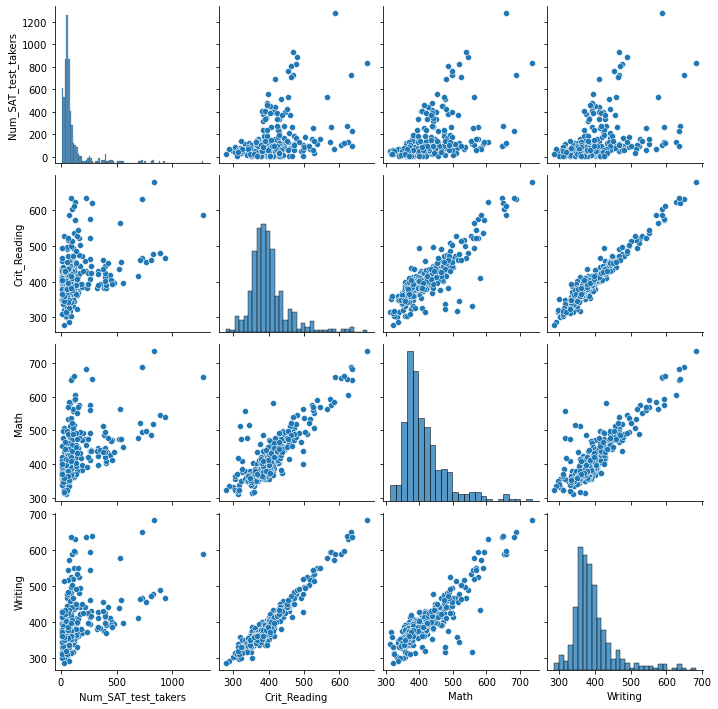

In [47]:
sns.pairplot(SAT);

In [53]:
x = SAT["Writing"]
x = x.values.reshape(-1, 1)
y = SAT["Crit_Reading"]
y = y.values.reshape(-1, 1)

In [55]:
model = linear_model.LinearRegression()
model.fit(x, y)
ypred_all = model.predict(x)

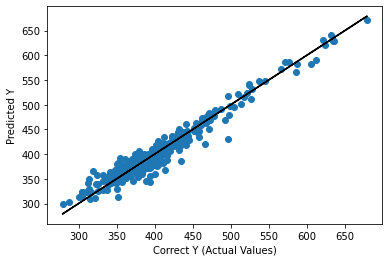

In [59]:
plt.scatter(y, ypred_all)
plt.plot(y, y, c = "k")
plt.xlabel("Correct Y (Actual Values)")
plt.ylabel("Predicted Y");

In [60]:
metrics.r2_score(y, ypred_all) # Range between 0-1, higher is more accurate

0.9415636447787411

In [61]:
model.coef_

array([[0.94001918]])

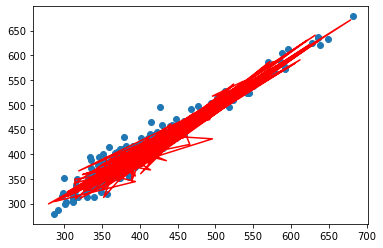

In [65]:
plt.scatter(x, y)
plt.plot(y, ypred_all, c = "r");

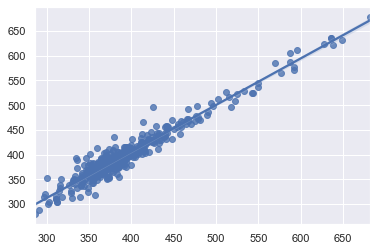

In [67]:
sns.set_theme()
sns.regplot(x = x, y = y);

In [69]:
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size = 0.25)

In [72]:
model = linear_model.LinearRegression()
model.fit(xtrain, ytrain)
ypred_test = model.predict(xtest)

In [73]:
metrics.r2_score(ytest, ypred_test)

0.9338463002813342

In [74]:
from sklearn.model_selection import cross_val_score as CVS

In [77]:
model = linear_model.LinearRegression()
cve = CVS(model, x, y, cv = 10)

In [78]:
cve

array([0.96212927, 0.92089979, 0.887618  , 0.85152801, 0.96672495,
       0.91351968, 0.80243475, 0.96234115, 0.95104306, 0.93398792])

In [79]:
min(cve) # Lowest accurate model generated

0.8024347510821971

In [80]:
max(cve) # Highest accurate model generated

0.9667249518873255

### Olympics Athelete Dataset

In [81]:
od = pd.read_csv("olympics_athlete_events.csv")

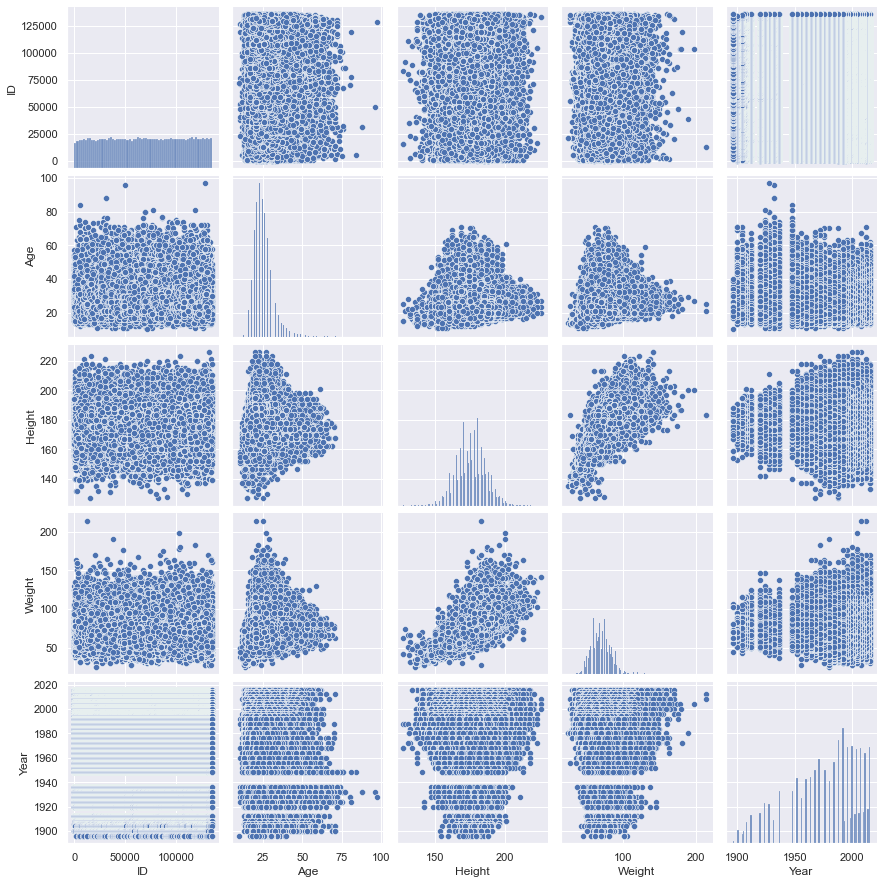

In [82]:
sns.pairplot(od);

In [83]:
od2 = od.dropna(subset = ["Height", "Weight"]) # Drop NA rows

x = od2["Height"].values.reshape(-1, 1)
y = od2["Weight"].values.reshape(-1, 1)

In [84]:
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size = 0.25)
model = linear_model.LinearRegression()
model.fit(xtrain, ytrain)
ypred_test = model.predict(xtest)

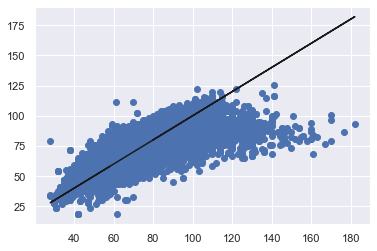

In [86]:
plt.scatter(ytest, ypred_test)
plt.plot(ytest, ytest, c = "k");

In [88]:
metrics.r2_score(ytest, ypred_test) # R2 score, higher is better

0.6302349510750447

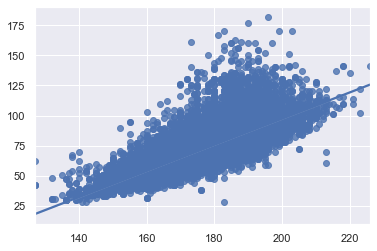

In [90]:
sns.regplot(x = xtest, y = ytest);

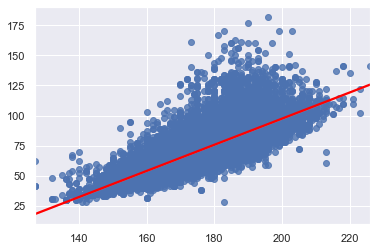

In [91]:
sns.regplot(x = xtest, y = ytest, line_kws = {"color": "red"}); # Make the prediction line red

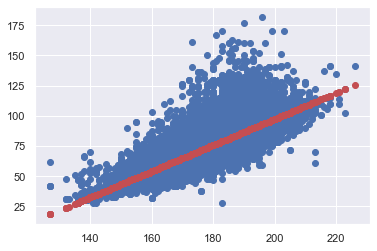

In [95]:
plt.scatter(xtest, ytest)
plt.scatter(xtest, ypred_test, c = "r");

In [93]:
model.coef_

array([[1.08183707]])

In [94]:
model.intercept_

array([-119.062134])

In [96]:
from sklearn.preprocessing import PolynomialFeatures as PF

In [97]:
poly = PF(degree = 2)
xnew = poly.fit_transform(x)

In [98]:
xnew

array([[1.0000e+00, 1.7000e+02, 2.8900e+04],
       [1.0000e+00, 1.6700e+02, 2.7889e+04],
       [1.0000e+00, 1.6700e+02, 2.7889e+04],
       ...,
       [1.0000e+00, 1.5900e+02, 2.5281e+04],
       [1.0000e+00, 1.5900e+02, 2.5281e+04],
       [1.0000e+00, 1.5900e+02, 2.5281e+04]])

In [99]:
x

array([[170.],
       [167.],
       [167.],
       ...,
       [159.],
       [159.],
       [159.]])

In [100]:
xtrain, xtest, ytrain, ytest = train_test_split(xnew, y, test_size = 0.25)
model = linear_model.LinearRegression()
model.fit(xtrain, ytrain)
ypred_test = model.predict(xtest)

In [104]:
metrics.r2_score(ytest, ypred_test) # show if there is an improvement

0.6338849109767588

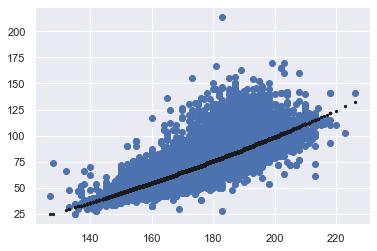

In [106]:
plt.scatter(xtest[:,1], ytest)
plt.scatter(xtest[:,1], ypred_test, c = "k", s = 5);

### Marathon Results 2017 Dataset

In [107]:
md = pd.read_csv("marathon_results_2017.csv")

In [109]:
md.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26410 entries, 0 to 26409
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Name           26410 non-null  object 
 1   Age            26410 non-null  int64  
 2   M/F            26410 non-null  object 
 3   City           26410 non-null  object 
 4   State          22815 non-null  object 
 5   Country        26410 non-null  object 
 6   5K             26410 non-null  int64  
 7   10K            26410 non-null  int64  
 8   15K            26410 non-null  int64  
 9   20K            26410 non-null  int64  
 10  Half           26410 non-null  int64  
 11  25K            26410 non-null  int64  
 12  30K            26410 non-null  int64  
 13  35K            26410 non-null  int64  
 14  40K            26410 non-null  int64  
 15  Official Time  26410 non-null  int64  
 16  speed (km/h)   26410 non-null  float64
 17  speed (mph)    26410 non-null  float64
dtypes: flo

In [110]:
md2 = md.dropna(subset = ["Age", "speed (km/h)"])
x = md2["Age"].values.reshape(-1, 1)
y = md2["speed (km/h)"].values.reshape(-1, 1)

In [113]:
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size = 0.25)
model = linear_model.LinearRegression()
model.fit(xtrain, ytrain)
ypred_test = model.predict(xtest)

In [114]:
metrics.r2_score(ytest, ypred_test)

0.06516698180315939

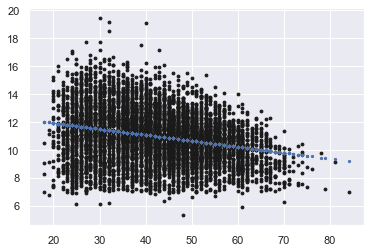

In [124]:
plt.scatter(xtest, ytest, c = "k", s = 8)
plt.scatter(xtest, ypred_test, c = "b", s = 5);

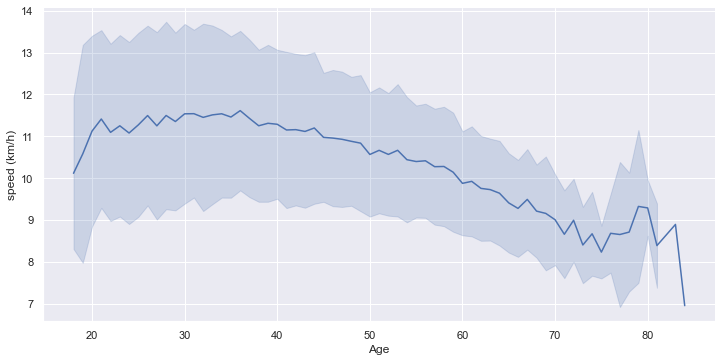

In [128]:
sns.relplot(data = md, x = "Age", y = "speed (km/h)", kind = "line", aspect = 2, ci = "sd");

In [131]:
poly = PF(degree = 2)
xnew = poly.fit_transform(x)
xtrain, xtest, ytrain, ytest = train_test_split(xnew, y, test_size = 0.25)
model = linear_model.LinearRegression()
model.fit(xtrain, ytrain)
ypred_test = model.predict(xtest)

In [132]:
metrics.r2_score(ytest, ypred_test)

0.08706386732004967

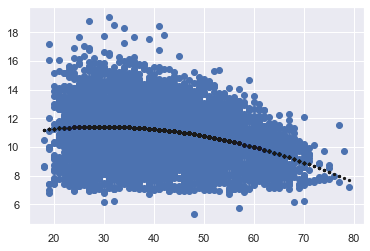

In [133]:
plt.scatter(xtest[:,1], ytest)
plt.scatter(xtest[:,1], ypred_test, c = "k", s = 5);

In [135]:
model = linear_model.LinearRegression()
cve = cross_val_score(model, x, y, cv = 10)

In [136]:
cve

array([-16.05411402, -58.53513552, -55.83725083, -31.89340905,
       -18.85454358, -18.3936555 , -27.1479943 , -57.80678245,
       -79.35533958, -54.80660318])

In [140]:
degrees = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
vrs = []
errors = []

for degree in degrees:
    poly = PF(degree = degree)
    xnew = poly.fit_transform(x)
    model = linear_model.LinearRegression()
    cve = cross_val_score(model, xnew, y, cv = 10, scoring = "neg_mean_squared_error")
    errors.append(cve.mean())
    vrs.append(cve.std())

In [139]:
errors

[-4.2558019399960525,
 -4.04693790716411,
 -3.9978583969598267,
 -4.005076006692802,
 -4.007286340352499,
 -4.007460329586575,
 -4.007079330297288,
 -4.0077749710315445,
 -4.007210037231934,
 -4.006969688120918]

In [141]:
vrs

[5.079073237381999,
 4.726081143511759,
 4.700877602272541,
 4.699192914839777,
 4.700529610719838,
 4.699778800941973,
 4.698778084451558,
 4.698726201194389,
 4.6982398052265735,
 4.69824655382696]

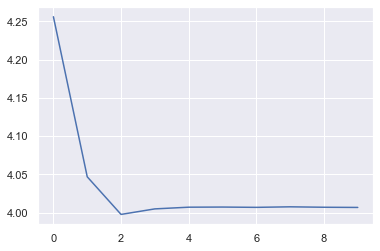

In [143]:
plt.plot(degrees, np.negative(errors)); # Compare the mean to the degrees

Using degrees of 2 is the most effective approach

In [146]:
from sklearn.datasets import load_boston as LB

In [149]:
x = LB().data
print(x)

[[6.3200e-03 1.8000e+01 2.3100e+00 ... 1.5300e+01 3.9690e+02 4.9800e+00]
 [2.7310e-02 0.0000e+00 7.0700e+00 ... 1.7800e+01 3.9690e+02 9.1400e+00]
 [2.7290e-02 0.0000e+00 7.0700e+00 ... 1.7800e+01 3.9283e+02 4.0300e+00]
 ...
 [6.0760e-02 0.0000e+00 1.1930e+01 ... 2.1000e+01 3.9690e+02 5.6400e+00]
 [1.0959e-01 0.0000e+00 1.1930e+01 ... 2.1000e+01 3.9345e+02 6.4800e+00]
 [4.7410e-02 0.0000e+00 1.1930e+01 ... 2.1000e+01 3.9690e+02 7.8800e+00]]


In [152]:
y = LB().target
print(y)

[24.  21.6 34.7 33.4 36.2 28.7 22.9 27.1 16.5 18.9 15.  18.9 21.7 20.4
 18.2 19.9 23.1 17.5 20.2 18.2 13.6 19.6 15.2 14.5 15.6 13.9 16.6 14.8
 18.4 21.  12.7 14.5 13.2 13.1 13.5 18.9 20.  21.  24.7 30.8 34.9 26.6
 25.3 24.7 21.2 19.3 20.  16.6 14.4 19.4 19.7 20.5 25.  23.4 18.9 35.4
 24.7 31.6 23.3 19.6 18.7 16.  22.2 25.  33.  23.5 19.4 22.  17.4 20.9
 24.2 21.7 22.8 23.4 24.1 21.4 20.  20.8 21.2 20.3 28.  23.9 24.8 22.9
 23.9 26.6 22.5 22.2 23.6 28.7 22.6 22.  22.9 25.  20.6 28.4 21.4 38.7
 43.8 33.2 27.5 26.5 18.6 19.3 20.1 19.5 19.5 20.4 19.8 19.4 21.7 22.8
 18.8 18.7 18.5 18.3 21.2 19.2 20.4 19.3 22.  20.3 20.5 17.3 18.8 21.4
 15.7 16.2 18.  14.3 19.2 19.6 23.  18.4 15.6 18.1 17.4 17.1 13.3 17.8
 14.  14.4 13.4 15.6 11.8 13.8 15.6 14.6 17.8 15.4 21.5 19.6 15.3 19.4
 17.  15.6 13.1 41.3 24.3 23.3 27.  50.  50.  50.  22.7 25.  50.  23.8
 23.8 22.3 17.4 19.1 23.1 23.6 22.6 29.4 23.2 24.6 29.9 37.2 39.8 36.2
 37.9 32.5 26.4 29.6 50.  32.  29.8 34.9 37.  30.5 36.4 31.1 29.1 50.
 33.3 3

In [153]:
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size = 0.25)
model = linear_model.LinearRegression()
model.fit(xtrain, ytrain)
ypred_test = model.predict(xtest)

In [154]:
metrics.r2_score(ytest, ypred_test)

0.7864505657096909

In [155]:
xtrain.shape

(379, 13)

In [157]:
ytrain.shape

(379,)

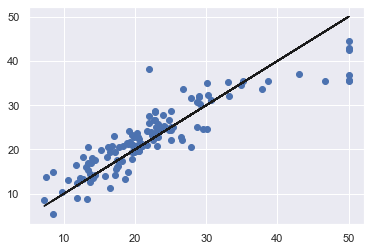

In [158]:
plt.scatter(ytest, ypred_test)
plt.plot(ytest, ytest, c = "k");

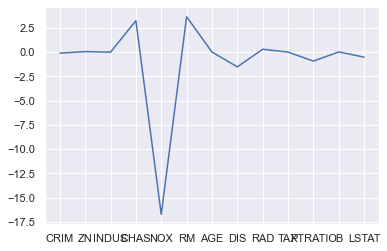

In [165]:
c = model.coef_
plt.plot(range(13), c)
plt.xticks(range(13), LB().feature_names);

#### Lasso Regression

In [166]:
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size = 0.25)
model = linear_model.Lasso(alpha = 0.1, normalize = True)
model.fit(xtrain, ytrain)
ypred_test = model.predict(xtest)

In [168]:
metrics.r2_score(ytest, ypred_test)

0.6131947318810702

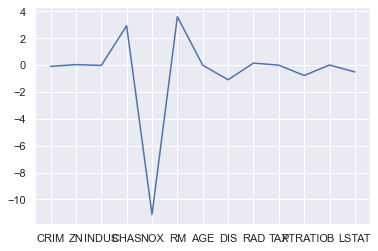

In [171]:
c = model.coef_
plt.plot(range(13), c)
plt.xticks(range(13), LB().feature_names);

#### Ridge Regression

In [169]:
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size = 0.25)
model = linear_model.Ridge(alpha = 0.1, normalize = True)
model.fit(xtrain, ytrain)
ypred_test = model.predict(xtest)

In [170]:
metrics.r2_score(ytest, ypred_test)

0.8434435708969767

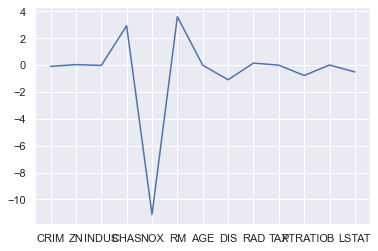

In [174]:
c = model.coef_
plt.plot(range(13), c)
plt.xticks(range(13), LB().feature_names);

In [179]:
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size = 0.25)
model = linear_model.Ridge(alpha = 10, normalize = True) # Higher alpha, shrinks coefficients.. less accurate
model.fit(xtrain, ytrain)
ypred_test = model.predict(xtest)

In [180]:
metrics.r2_score(ytest, ypred_test)

0.26535634138361974

In [188]:
alphas = [0.001, 0.01, 0.1, 1, 5, 10, 50, 100, 500, 1000, 5000, 10000]
model = linear_model.RidgeCV(alphas = alphas, store_cv_values = True, normalize = True)
model.fit(x, y)

RidgeCV(alphas=array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 5.e+00, 1.e+01, 5.e+01, 1.e+02,
       5.e+02, 1.e+03, 5.e+03, 1.e+04]),
        normalize=True, store_cv_values=True)

In [189]:
model.cv_values_

array([[ 37.45054844,  38.56241633,  39.82167591, ...,   2.06439322,
          2.14156846,   2.1513632 ],
       [ 11.98982507,  11.92688777,  12.05116845, ...,   0.91049932,
          0.88093731,   0.87725566],
       [ 17.48016596,  17.42718034,  18.01810886, ..., 147.81886961,
        148.46488017, 148.54612572],
       ...,
       [ 14.63814577,  14.60320121,  12.93388384, ...,   1.85086233,
          1.87144709,   1.87403612],
       [ 17.86915647,  17.93283103,  17.0230091 , ...,   0.29288084,
          0.28657858,   0.28579303],
       [113.67901407, 113.49741233, 111.52976894, ..., 113.51446039,
        113.50673166, 113.50574891]])

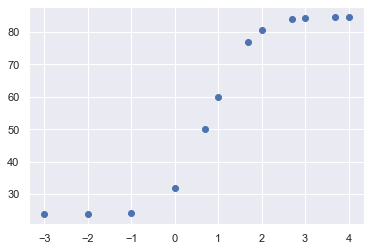

In [191]:
plt.scatter(np.log10(alphas), np.mean(model.cv_values_, axis = 0));

The higher the alphas get, the worse the model gets. Picking -1 would be the best approach